- 데이터 출처: https://m.blog.naver.com/PostView.naver?blogId=upennsolution&logNo=222615184865&proxyReferer=

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import seaborn as sns

In [46]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [47]:
seoul = pd.read_excel('서울_치킨업소_정보.xlsx')
seoul.head()

,업소명,프랜차이즈명,시/도,군/구,읍/면/동,상세주소,전화번호
0,당신은지금치킨이땡긴다-논현2호점,당신은지금치킨이땡긴다,서울,강남구,논현동,108 논현웰스톤 지하2층 B201호 주방26호,5.035300e+10
1,당신은지금치킨이땡긴다-논현2호점,당신은지금치킨이땡긴다,서울,강남구,논현동,108 논현웰스톤 지하2층 B201호 주방26호,5.035300e+10
2,치킨이맛있는집-개포본점,NaN,서울,강남구,개포동,"1222-11 1층 101,102호",5.035258e+10
3,맘스터치-포이사거리점,맘스터치,서울,강남구,개포동,1229-6 1층 101호,5.035289e+10
4,맘스터치-포이사거리점,맘스터치,서울,강남구,개포동,1229-6 1층 101호,5.035289e+10


In [48]:
# 데이터 프레임 정보 확인
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업소명     1230 non-null   object 
 1   프랜차이즈명  819 non-null    object 
 2   시/도     1230 non-null   object 
 3   군/구     1230 non-null   object 
 4   읍/면/동   1230 non-null   object 
 5   상세주소    1230 non-null   object 
 6   전화번호    1028 non-null   float64
dtypes: float64(1), object(6)
memory usage: 67.4+ KB


In [49]:
# 결측치 확인
seoul.isna().sum()

업소명         0
프랜차이즈명    411
시/도         0
군/구         0
읍/면/동       0
상세주소        0
전화번호      202
dtype: int64

In [51]:
# 결측치 처리 - 대체
# 소상공인이 운영하는 매장의 경우, 프랜차이즈가 없을 수도 있음
# seoul.업소명.split('-')[0]을 프랜차이즈명에 기재하도록 한다.
seoul['프랜차이즈명'] = seoul['업소명'].apply(lambda x: x.split('-')[0])
seoul.head()

,업소명,프랜차이즈명,시/도,군/구,읍/면/동,상세주소,전화번호
0,당신은지금치킨이땡긴다-논현2호점,당신은지금치킨이땡긴다,서울,강남구,논현동,108 논현웰스톤 지하2층 B201호 주방26호,5.035300e+10
1,당신은지금치킨이땡긴다-논현2호점,당신은지금치킨이땡긴다,서울,강남구,논현동,108 논현웰스톤 지하2층 B201호 주방26호,5.035300e+10
2,치킨이맛있는집-개포본점,치킨이맛있는집,서울,강남구,개포동,"1222-11 1층 101,102호",5.035258e+10
3,맘스터치-포이사거리점,맘스터치,서울,강남구,개포동,1229-6 1층 101호,5.035289e+10
4,맘스터치-포이사거리점,맘스터치,서울,강남구,개포동,1229-6 1층 101호,5.035289e+10


In [52]:
seoul.isna().sum()

업소명         0
프랜차이즈명      0
시/도         0
군/구         0
읍/면/동       0
상세주소        0
전화번호      202
dtype: int64

- 전화번호 결측치에 대해서는 어떻게 처리해야 할지 모르겠음

In [55]:
seoul.전화번호

0       5.035300e+10
1       5.035300e+10
2       5.035258e+10
3       5.035289e+10
4       5.035289e+10
            ...     
1225             NaN
1226    5.035260e+10
1227    5.071292e+10
1228    5.035297e+10
1229    5.071298e+10
Name: 전화번호, Length: 1230, dtype: float64

In [62]:
seoul.groupby('프랜차이즈명')['업소명'].count()

프랜차이즈명
1인한끼밥상        1
402치킨         8
60계           9
60계치킨        13
64겹페스츄리피자    23
             ..
호남식당          1
호식이두마리치킨     19
호야닭도리         2
혼밥장인          1
훌랄라치킨         4
Name: 업소명, Length: 186, dtype: int64

In [63]:
# 서울의 프랜차이즈 중 가장 많은 비중을 차지하고 있는 것은 BBQ!
seoul.프랜차이즈명.value_counts()

BBQ                112
멕시카나                65
BHC                 62
피자나라치킨공주            52
티바두마리치킨             44
                  ... 
정통매운갈비찜&곱도리탕         1
치킨매니아                1
아트몬스터수제맥주&치킨&피자      1
밥도둑한끼품격              1
논현집                  1
Name: 프랜차이즈명, Length: 186, dtype: int64

In [67]:
# 프랜차이즈가 아닌 치킨집은 총 80곳
no_fran = seoul.프랜차이즈명.value_counts()
no_fran[ no_fran < 2 ]

Mr매운갈비찜&찜닭         1
장군식당               1
치킨공식               1
버들식당               1
오름집                1
                  ..
정통매운갈비찜&곱도리탕       1
치킨매니아              1
아트몬스터수제맥주&치킨&피자    1
밥도둑한끼품격            1
논현집                1
Name: 프랜차이즈명, Length: 80, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '논현동'),
  Text(1, 0, '개포동'),
  Text(2, 0, '도곡동'),
  Text(3, 0, '대치동'),
  Text(4, 0, '역삼동'),
  Text(5, 0, '신사동'),
  Text(6, 0, '삼성동'),
  Text(7, 0, '자곡동'),
  Text(8, 0, '세곡동'),
  Text(9, 0, '일원동'),
  Text(10, 0, '수서동'),
  Text(11, 0, '청담동'),
  Text(12, 0, '압구정동'),
  Text(13, 0, '율현동')])

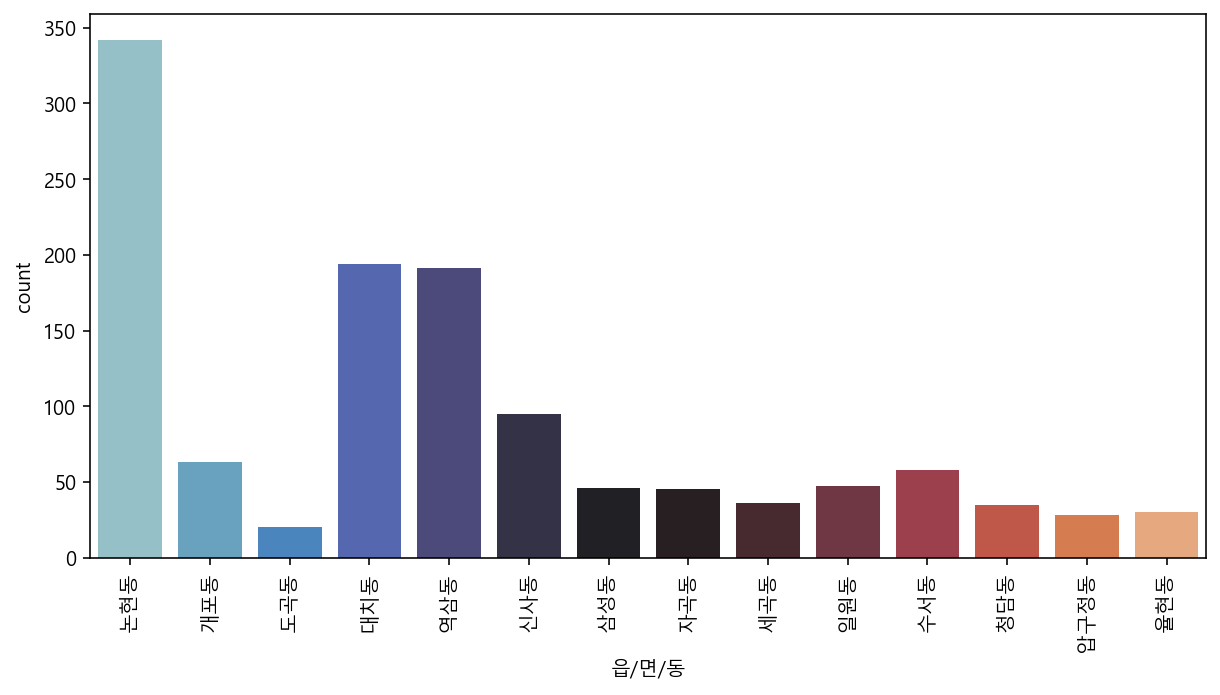

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(seoul['읍/면/동'], palette='icefire')
plt.xticks(rotation=90)